#### Load the dataset for preprocessing.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import spearmanr
from operator import itemgetter
from imblearn.under_sampling import RandomUnderSampler

df = pd.read_csv('../dataset/original-sam-dataset.csv', sep='|')

#### Display the dataset size.

In [4]:
df.shape

(1536000, 33)

#### Display dataset data types.

In [5]:
df.dtypes

CZ       float64
FZ       float64
Fp1      float64
F7       float64
F3       float64
FC1      float64
C3       float64
FC5      float64
FT9      float64
T7       float64
CP5      float64
CP1      float64
P3       float64
P7       float64
PO9      float64
O1       float64
PZ       float64
OZ       float64
O2       float64
PO10     float64
P8       float64
P4       float64
CP2      float64
CP6      float64
T8       float64
FT10     float64
FC6      float64
C4       float64
FC2      float64
F4       float64
F8       float64
Fp2      float64
Scale      int64
dtype: object

#### Verify the first rows of the dataset.
- Values were recorded with up to 16 decimal places.

In [6]:
pd.set_option("display.precision", 16)

In [7]:
df.head()

,CZ,FZ,Fp1,F7,F3,FC1,C3,FC5,FT9,T7,...,CP6,T8,FT10,FC6,C4,FC2,F4,F8,Fp2,Scale
0,-1.2383486114945983,5.2794326933772240,3.9814746145283482,2.6280416190806322,-2.1007678335999249,-1.9989967686700336,-4.9883669305570884,-3.7803177749639976,-4.7583095500925143,-5.5689874359255596,...,-0.3924718416205484,-1.7170901157628116,-0.8100412282863649,0.6378802287893857,2.5998138046934560,3.0299823736891707,3.3972778537286241,3.9683485809900998,0.4550118825535070,6
1,1.4239787068597041,5.1104486668960769,6.3427004459512704,5.6338457405544293,2.1580544919595699,0.7277104025179058,0.0692525735196927,-0.3670844266820248,1.0434583271706359,3.0776204511198348,...,6.0406631743693397,7.2412057884495233,6.8066635697671645,4.4704639885723330,2.7907139030290846,3.5243011533507245,3.9385629593110658,4.7654203028335829,4.2802985157017019,6
2,5.4872093810322484,5.3143669631815964,4.9368189755393743,3.5669702639322312,3.5725592376445539,4.8564403202529460,4.3979784374839674,1.2692383019345774,-1.0993331984673311,1.8191022315402043,...,7.5005470692552771,9.2785083157865760,9.1588271666405596,8.1502025024818696,3.7953687226701280,2.7811957820403830,4.4025206038998919,6.6044161101225392,5.9452103000926622,6
3,0.3620324272079864,-0.5394029122556379,1.1851194275005092,0.6802814922997784,-0.1321814964857504,0.0459274606719242,-0.2359971733171697,1.5376711110445811,2.1871602464926743,0.7377086216647857,...,1.7832389555799917,0.4461840601688687,0.4010784083839049,0.9076386951514276,1.0941557628471985,-1.3156980408229739,0.0245936633898042,1.0686564785634871,5.6591524277145702,6
4,-5.6885209146824316,-9.1236032918793857,-4.4132584297255173,-3.7610823774458231,-5.5381653052650437,-7.1230408015231719,-5.5360395566463243,-2.0490934259723002,0.8579566729164694,-0.1068054073449720,...,-4.1473359454541576,-4.7962412864987582,-5.7428952960390616,-5.0867927181204484,-3.8277625649506430,-3.9844719056148690,-6.5679845602254332,-8.9763748395718945,2.1767166228500425,6


#### Display dataset statistics.

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df[df.columns[0:10]].describe().apply(lambda s: s.apply('{0:.3f}'.format))

,CZ,FZ,Fp1,F7,F3,FC1,C3,FC5,FT9,T7
count,1536000.000,1536000.000,1536000.000,1536000.000,1536000.000,1536000.000,1536000.000,1536000.000,1536000.000,1536000.000
mean,-0.010,-0.021,-0.013,-0.012,-0.019,-0.025,-0.023,-0.016,-0.014,-0.011
std,7.727,8.584,8.790,8.267,7.036,7.067,6.754,5.871,5.794,5.498
min,-49.585,-42.544,-48.985,-48.485,-37.925,-38.264,-34.834,-30.733,-33.743,-32.798
25%,-5.116,-5.684,-5.753,-5.355,-4.597,-4.669,-4.453,-3.834,-3.789,-3.604
50%,-0.024,-0.084,-0.101,-0.100,-0.049,-0.058,-0.049,-0.032,-0.034,-0.041
75%,5.097,5.574,5.569,5.192,4.515,4.591,4.388,3.785,3.733,3.564
max,51.501,47.776,57.991,60.306,47.887,39.639,36.767,36.827,40.532,35.447


In [10]:
df[df.columns[10:20]].describe().apply(lambda s: s.apply('{0:.3f}'.format))

,CP5,CP1,P3,P7,PO9,O1,PZ,OZ,O2,PO10
count,1536000.000,1536000.000,1536000.000,1536000.000,1536000.000,1536000.000,1536000.000,1536000.000,1536000.000,1536000.000
mean,-0.016,-0.017,-0.014,-0.003,-0.003,-0.004,-0.009,-0.006,-0.003,-0.001
std,6.051,6.867,6.480,5.729,6.291,6.625,7.248,7.274,7.174,6.857
min,-30.846,-45.417,-43.937,-29.672,-35.670,-41.904,-51.864,-47.037,-42.646,-37.409
25%,-4.012,-4.491,-4.237,-3.759,-4.113,-4.333,-4.659,-4.683,-4.678,-4.537
50%,-0.042,-0.039,-0.036,-0.037,-0.060,-0.040,-0.029,-0.032,-0.044,-0.038
75%,3.961,4.442,4.195,3.716,4.049,4.291,4.626,4.652,4.628,4.497
max,41.467,44.974,39.826,33.052,33.855,44.044,50.067,54.883,42.188,43.994


In [11]:
df[df.columns[20:30]].describe().apply(lambda s: s.apply('{0:.3f}'.format))

,P8,P4,CP2,CP6,T8,FT10,FC6,C4,FC2,F4
count,1536000.000,1536000.000,1536000.000,1536000.000,1536000.000,1536000.000,1536000.000,1536000.000,1536000.000,1536000.000
mean,-0.002,-0.012,-0.013,-0.015,-0.012,-0.017,-0.020,-0.024,-0.028,-0.025
std,7.014,7.503,7.550,7.159,7.339,7.372,7.354,7.600,7.732,7.939
min,-44.366,-55.229,-52.448,-40.082,-40.586,-41.083,-40.883,-41.263,-41.750,-41.285
25%,-4.607,-4.915,-4.936,-4.719,-4.827,-4.863,-4.822,-5.003,-5.098,-5.227
50%,-0.029,-0.029,-0.030,-0.028,-0.008,-0.021,-0.033,-0.044,-0.059,-0.068
75%,4.574,4.876,4.897,4.675,4.800,4.834,4.771,4.935,5.023,5.145
max,53.412,59.624,52.628,43.557,40.981,40.228,39.452,43.527,40.771,40.697


In [12]:
df[df.columns[30:33]].describe().apply(lambda s: s.apply('{0:.3f}'.format))

,F8,Fp2,Scale
count,1536000.000,1536000.000,1536000.000
mean,-0.020,-0.027,3.608
std,8.782,11.102,2.718
min,-44.351,-66.440,0.000
25%,-5.755,-7.235,0.750
50%,-0.088,-0.175,4.000
75%,5.644,6.954,6.000
max,51.631,80.273,10.000


#### Check for missing data.
- No missing data, eliminating the need to perform some data imputation.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536000 entries, 0 to 1535999
Data columns (total 33 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   CZ      1536000 non-null  float64
 1   FZ      1536000 non-null  float64
 2   Fp1     1536000 non-null  float64
 3   F7      1536000 non-null  float64
 4   F3      1536000 non-null  float64
 5   FC1     1536000 non-null  float64
 6   C3      1536000 non-null  float64
 7   FC5     1536000 non-null  float64
 8   FT9     1536000 non-null  float64
 9   T7      1536000 non-null  float64
 10  CP5     1536000 non-null  float64
 11  CP1     1536000 non-null  float64
 12  P3      1536000 non-null  float64
 13  P7      1536000 non-null  float64
 14  PO9     1536000 non-null  float64
 15  O1      1536000 non-null  float64
 16  PZ      1536000 non-null  float64
 17  OZ      1536000 non-null  float64
 18  O2      1536000 non-null  float64
 19  PO10    1536000 non-null  float64
 20  P8      1536000 non-null

#### Check for cells with zero values in features.
- There are no features with zero values. Only the label (Scale) has the value zero; which is valid since zero is one of the valid dataset classes.

In [14]:
df[df == 0].count()

CZ            0
FZ            0
Fp1           0
F7            0
F3            0
FC1           0
C3            0
FC5           0
FT9           0
T7            0
CP5           0
CP1           0
P3            0
P7            0
PO9           0
O1            0
PZ            0
OZ            0
O2            0
PO10          0
P8            0
P4            0
CP2           0
CP6           0
T8            0
FT10          0
FC6           0
C4            0
FC2           0
F4            0
F8            0
Fp2           0
Scale    384000
dtype: int64

#### Check for duplicate records in dataset.
- No duplicate records found.

In [15]:
len(df[df.drop('Scale', axis = 1).duplicated()])

0

#### Generate target histogram to check class distribution.

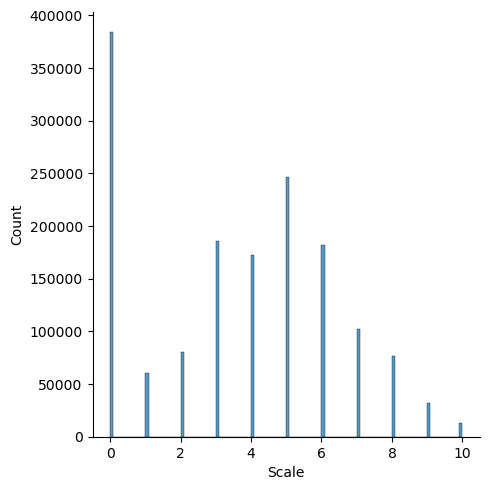

In [17]:
sns.displot(df['Scale'])

#### Check how the classes are balanced.
- The dataset is very unbalanced.

In [18]:
instances_count = df['Scale'].value_counts().sum()
class_distribution = df['Scale'].value_counts().to_dict()
for key, value in class_distribution.items() :
    print(f"Class = {key:2.0f}   Qty = {value:6.0f}   Percentage = {(value/instances_count*100):.2f} %")

Class =  0   Qty = 384000   Percentage = 25.00 %
Class =  5   Qty = 246400   Percentage = 16.04 %
Class =  3   Qty = 185600   Percentage = 12.08 %
Class =  6   Qty = 182400   Percentage = 11.88 %
Class =  4   Qty = 172800   Percentage = 11.25 %
Class =  7   Qty = 102400   Percentage = 6.67 %
Class =  2   Qty =  80000   Percentage = 5.21 %
Class =  8   Qty =  76800   Percentage = 5.00 %
Class =  1   Qty =  60800   Percentage = 3.96 %
Class =  9   Qty =  32000   Percentage = 2.08 %
Class = 10   Qty =  12800   Percentage = 0.83 %


#### Apply downsampling to balance the dataset.
- The classes had their number of samples reduced to the number of samples of the minority class.

In [19]:
rus = RandomUnderSampler(random_state = 42)
X = df.iloc[:, 0:32]
y = df.iloc[:, 32:33]
X_resampled, y_resampled = rus.fit_resample(X, y)
print(y_resampled['Scale'].value_counts())

0     12800
1     12800
2     12800
3     12800
4     12800
5     12800
6     12800
7     12800
8     12800
9     12800
10    12800
Name: Scale, dtype: int64


#### Generate the new dataset after downsampling and display its statistics.

In [20]:
new_df = pd.DataFrame(data = X_resampled, dtype = np.float64, 
                      columns = ['CZ', 'FZ', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 
                                 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 
                                 'PZ', 'OZ', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 
                                 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2'])
new_df['Scale'] = y_resampled
print(new_df.describe().apply(lambda s: s.apply('{0:.3f}'.format)))

               CZ          FZ         Fp1          F7          F3         FC1  \
count  140800.000  140800.000  140800.000  140800.000  140800.000  140800.000   
mean       -0.039      -0.040      -0.028      -0.034      -0.046      -0.062   
std         7.664       8.481       8.758       8.283       6.971       6.945   
min       -37.061     -39.063     -41.901     -43.100     -33.142     -33.259   
25%        -5.121      -5.634      -5.767      -5.402      -4.578      -4.629   
50%        -0.044      -0.104      -0.129      -0.132      -0.081      -0.091   
75%         5.065       5.523       5.592       5.225       4.464       4.510   
max        38.590      41.983      52.472      52.103      38.223      39.639   

               C3         FC5         FT9          T7         CP5         CP1  \
count  140800.000  140800.000  140800.000  140800.000  140800.000  140800.000   
mean       -0.059      -0.046      -0.043      -0.039      -0.048      -0.052   
std         6.625       5.8

#### Generate the features histogram again to check if the distribution continues with the same feature.

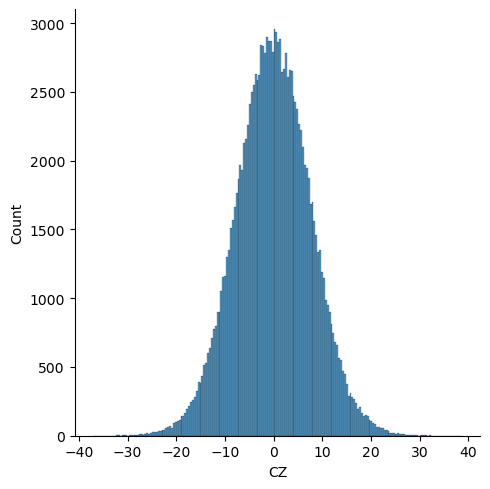

In [25]:
sns.displot(new_df['CZ'])

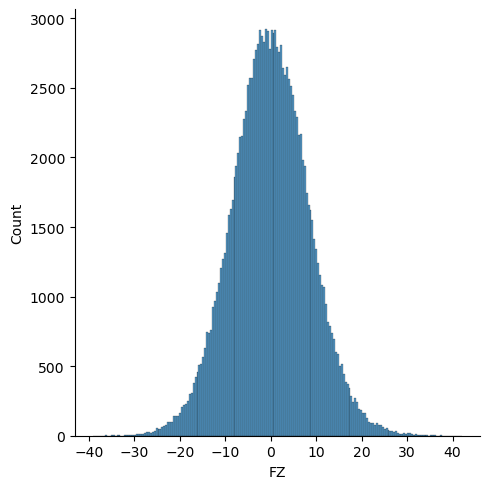

In [26]:
sns.displot(new_df['FZ'])

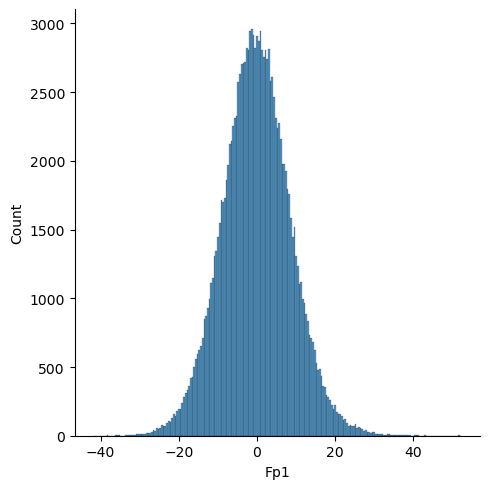

In [27]:
sns.displot(new_df['Fp1'])

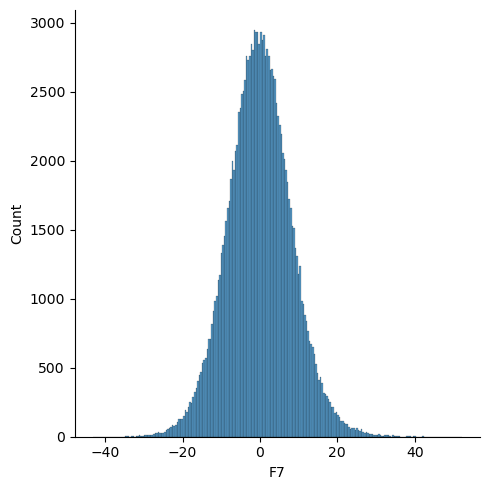

In [28]:
sns.displot(new_df['F7'])

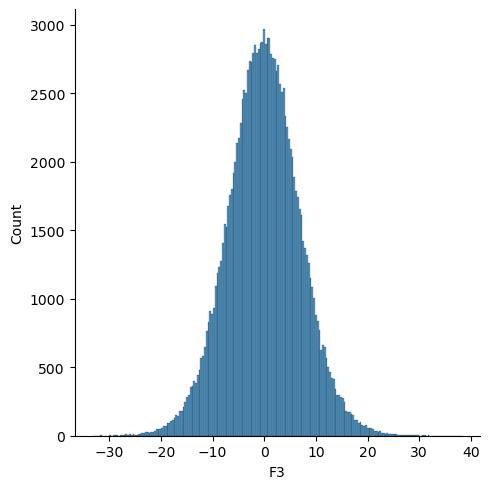

In [29]:
sns.displot(new_df['F3'])

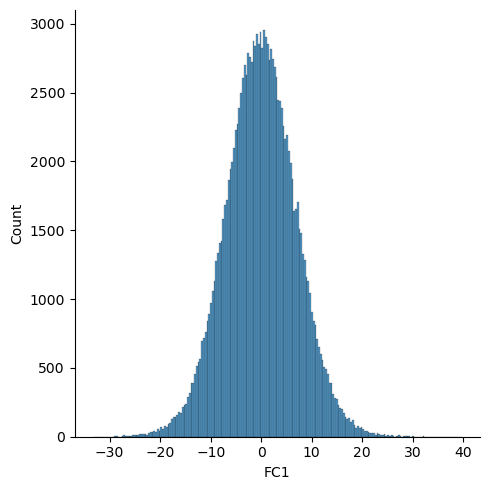

In [30]:
sns.displot(new_df['FC1'])

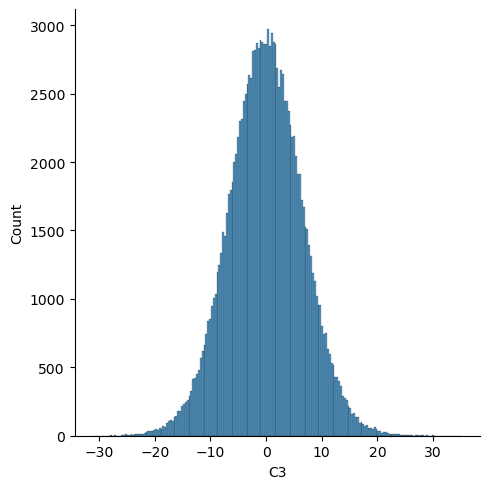

In [31]:
sns.displot(new_df['C3'])

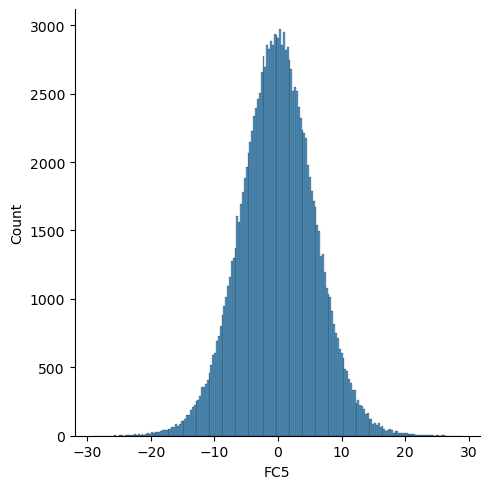

In [32]:
sns.displot(new_df['FC5'])

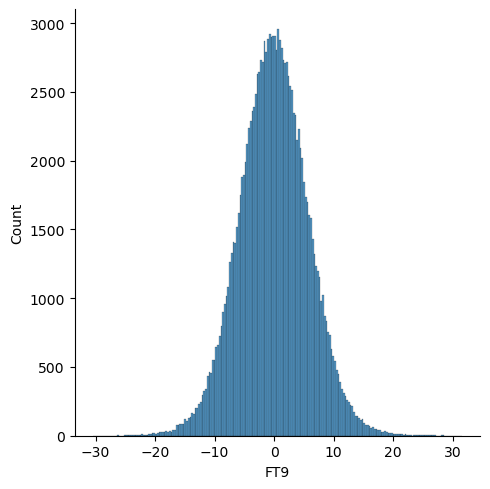

In [33]:
sns.displot(new_df['FT9'])

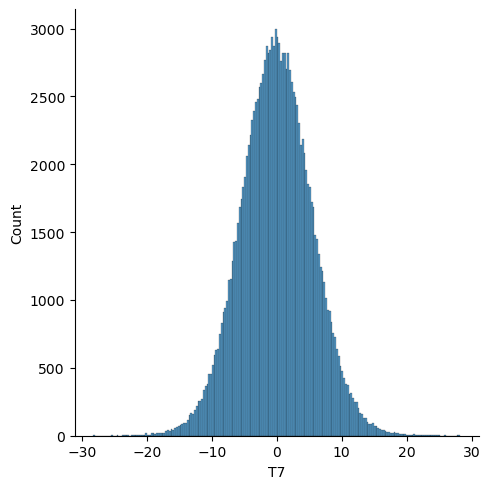

In [34]:
sns.displot(new_df['T7'])

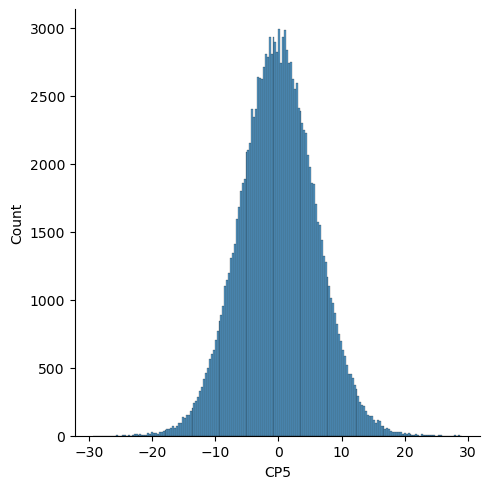

In [35]:
sns.displot(new_df['CP5'])

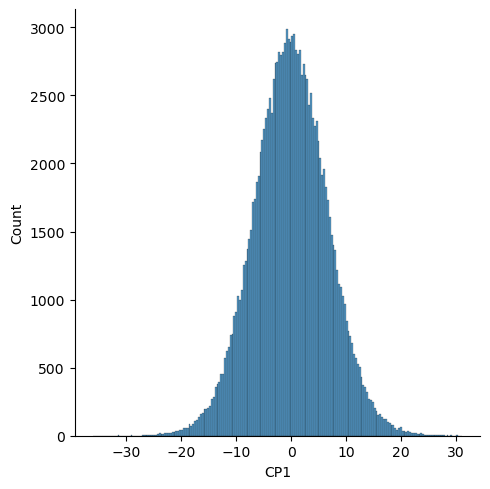

In [36]:
sns.displot(new_df['CP1'])

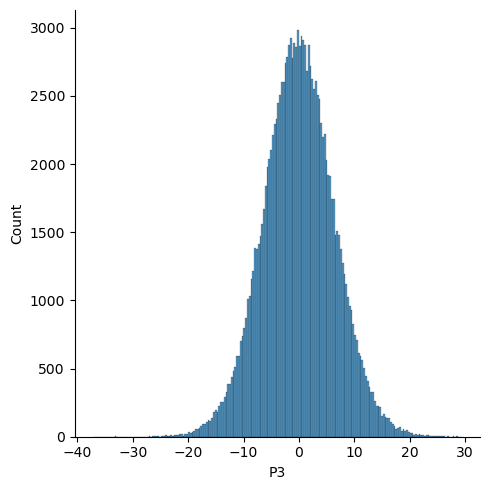

In [37]:
sns.displot(new_df['P3'])

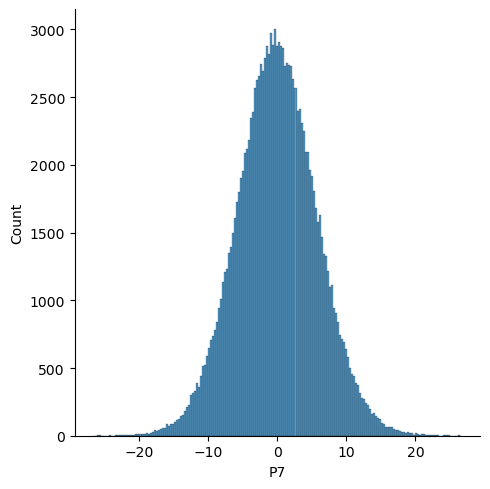

In [38]:
sns.displot(new_df['P7'])

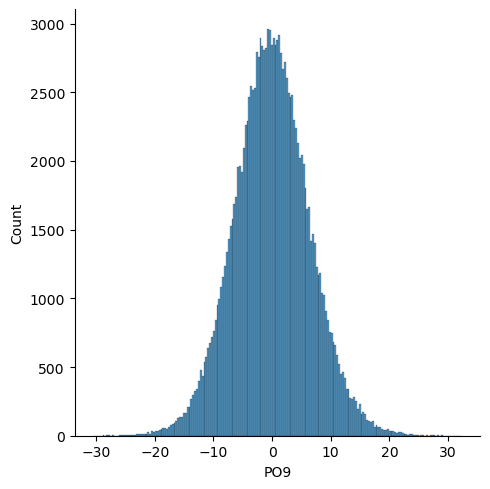

In [39]:
sns.displot(new_df['PO9'])

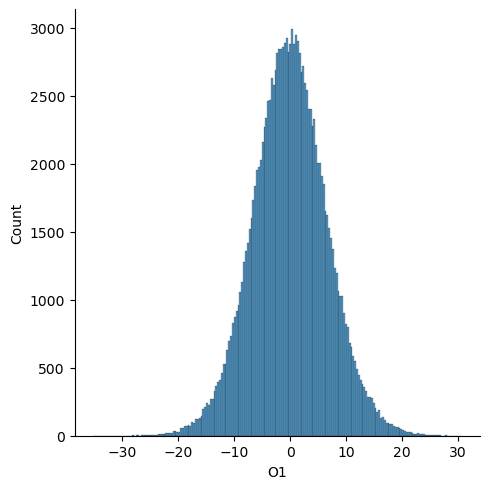

In [40]:
sns.displot(new_df['O1'])

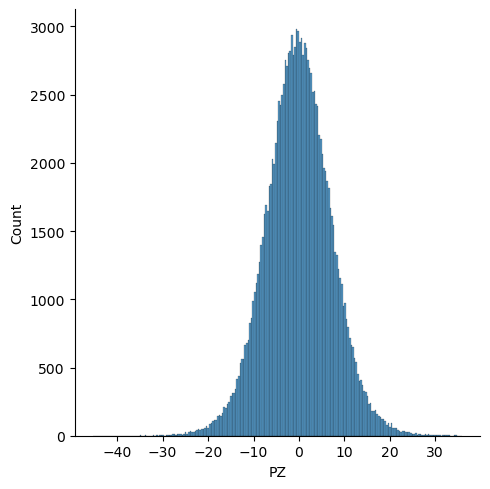

In [41]:
sns.displot(new_df['PZ'])

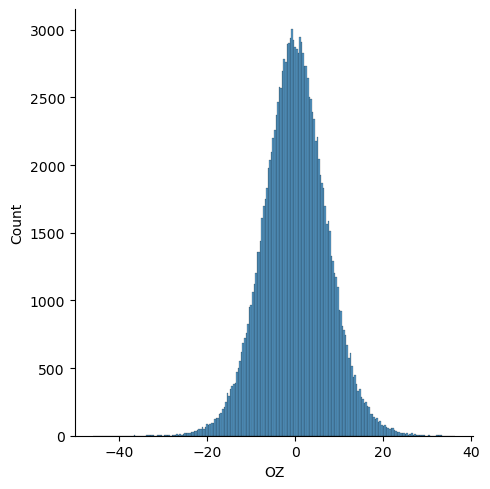

In [42]:
sns.displot(new_df['OZ'])

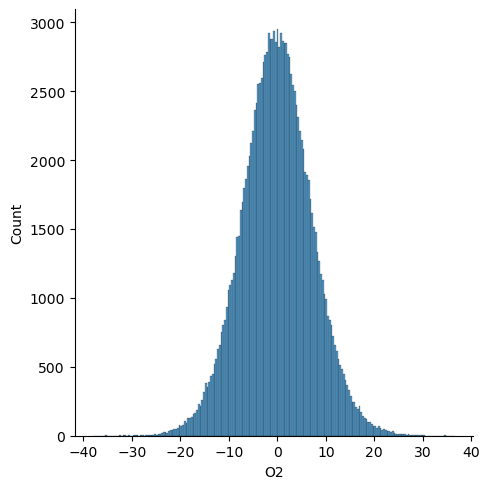

In [43]:
sns.displot(new_df['O2'])

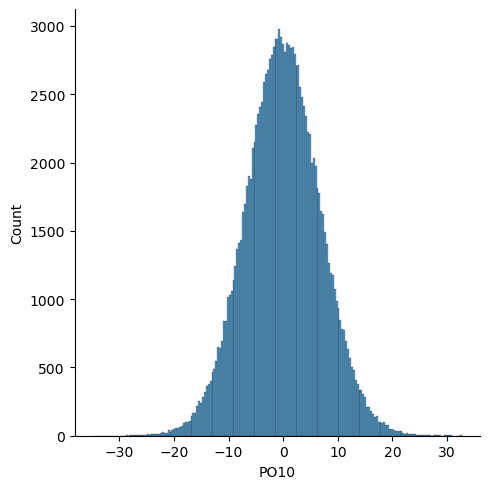

In [44]:
sns.displot(new_df['PO10'])

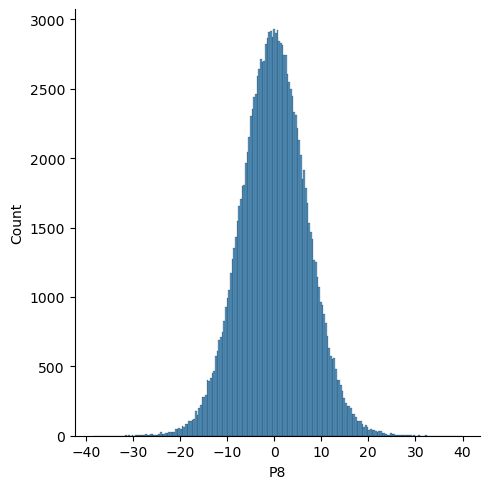

In [45]:
sns.displot(new_df['P8'])

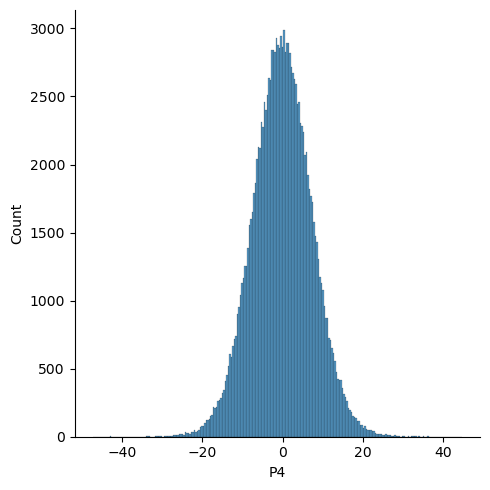

In [46]:
sns.displot(new_df['P4'])

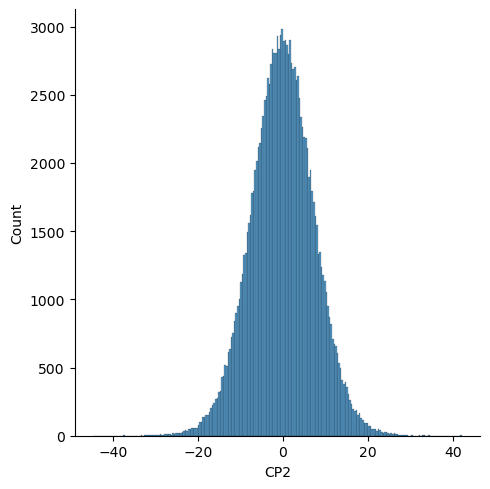

In [47]:
sns.displot(new_df['CP2'])

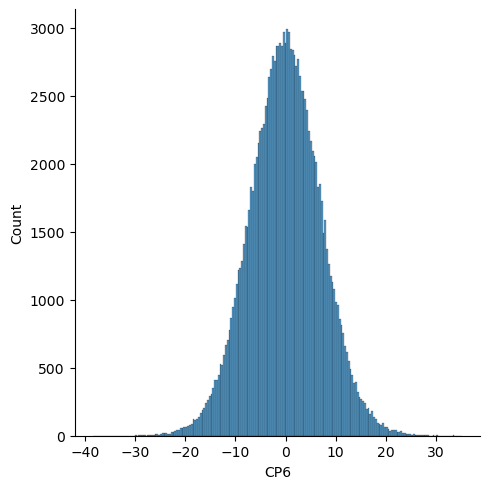

In [48]:
sns.displot(new_df['CP6'])

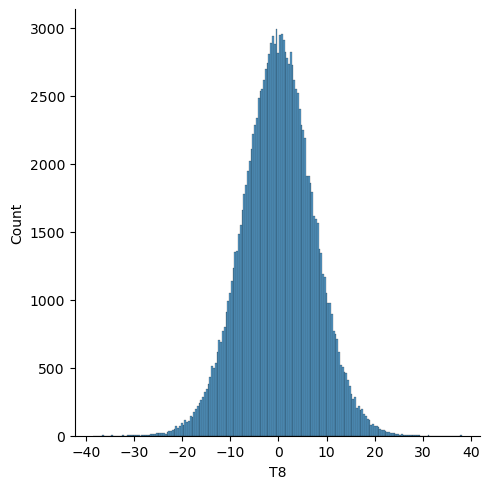

In [49]:
sns.displot(new_df['T8'])

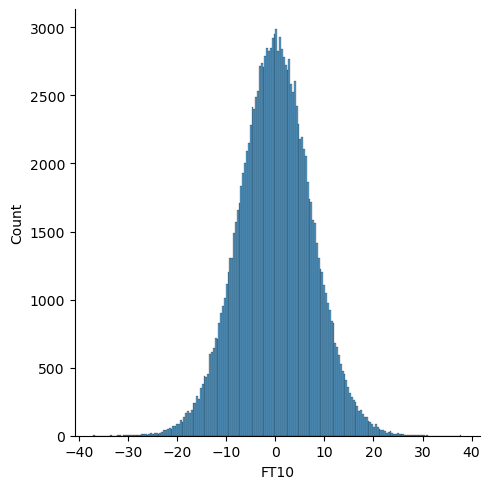

In [50]:
sns.displot(new_df['FT10'])

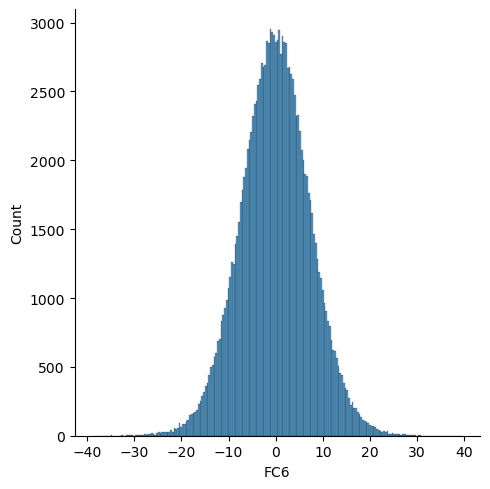

In [51]:
sns.displot(new_df['FC6'])

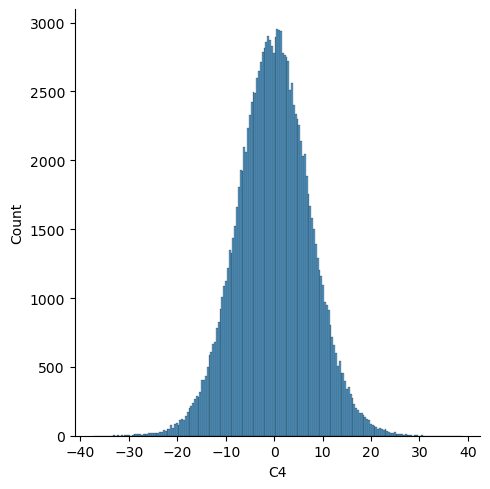

In [52]:
sns.displot(new_df['C4'])

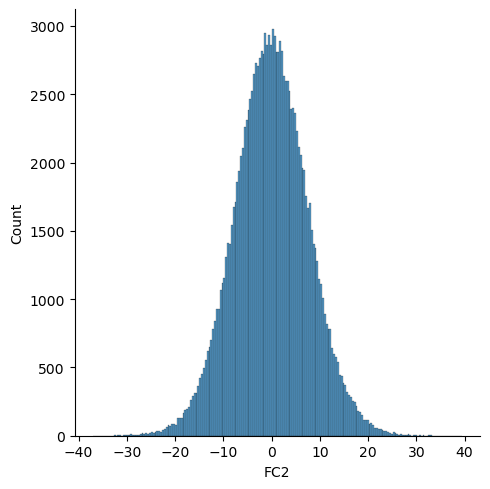

In [53]:
sns.displot(new_df['FC2'])

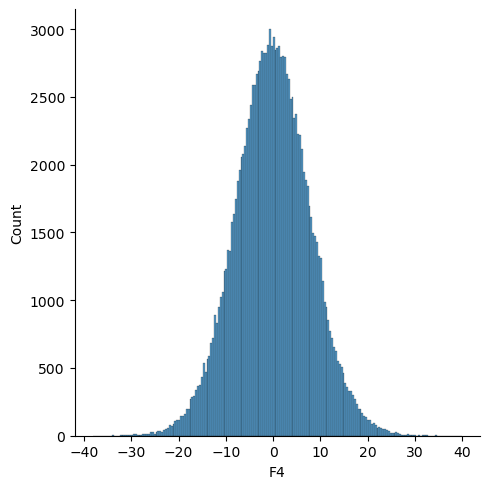

In [54]:
sns.displot(new_df['F4'])

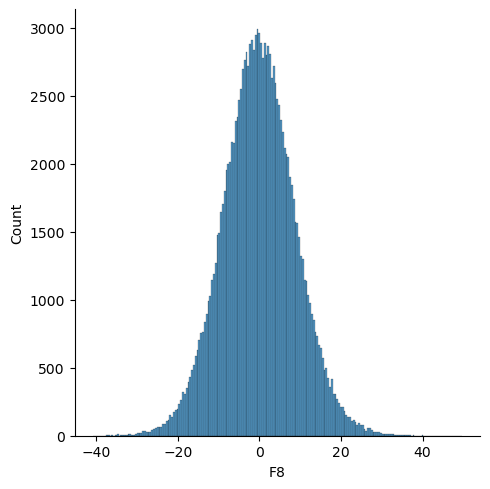

In [55]:
sns.displot(new_df['F8'])

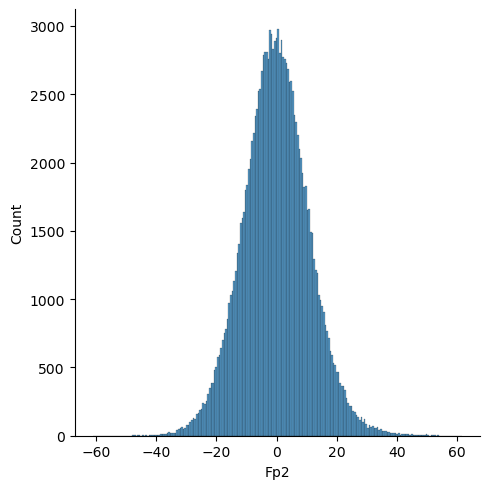

In [56]:
sns.displot(new_df['Fp2'])

#### Check the Skewness of features.
- Distributions are symmetrical and unaffected by distortions..

In [57]:
for i in new_df.columns :
    print("Skewness for {} is {}".format(i, new_df[i].astype(float).skew()))

Skewness for CZ is 0.004582212690596414
Skewness for FZ is 0.05529296484588765
Skewness for Fp1 is 0.11136097320510044
Skewness for F7 is 0.10650226786825691
Skewness for F3 is 0.03553148164450839
Skewness for FC1 is 0.014966000083597435
Skewness for C3 is 0.0054169564648539545
Skewness for FC5 is 0.0014936963357424435
Skewness for FT9 is 0.017686258305067665
Skewness for T7 is 0.025085140458883243
Skewness for CP5 is 0.026175738818812057
Skewness for CP1 is 0.012302973943991111
Skewness for P3 is 0.01600630288772407
Skewness for P7 is 0.034599635110546395
Skewness for PO9 is 0.06316074191971217
Skewness for O1 is 0.03829049559044903
Skewness for PZ is 0.022583283535248286
Skewness for OZ is 0.02219466422378664
Skewness for O2 is 0.043218072806530054
Skewness for PO10 is 0.027085806458362963
Skewness for P8 is 0.018022727561205567
Skewness for P4 is 0.0051216236278820056
Skewness for CP2 is 0.003327409485136402
Skewness for CP6 is -0.0022007723222119005
Skewness for T8 is -0.0170921802

#### Check the Kurtosis of the features.
- Distributions are symmetrical and unaffected by distortions.

In [58]:
for i in new_df.columns :
    print("Kurtosis for {} is {}".format(i, new_df[i].astype(float).kurt()))

Kurtosis for CZ is 0.20163826904385607
Kurtosis for FZ is 0.26664070588481037
Kurtosis for Fp1 is 0.4494835348478241
Kurtosis for F7 is 0.5374231083805423
Kurtosis for F3 is 0.3734107370047792
Kurtosis for FC1 is 0.29403212950124313
Kurtosis for C3 is 0.26462816774737963
Kurtosis for FC5 is 0.3675326330678992
Kurtosis for FT9 is 0.44539298614595424
Kurtosis for T7 is 0.40414002404134086
Kurtosis for CP5 is 0.22401161240597744
Kurtosis for CP1 is 0.2952658217089317
Kurtosis for P3 is 0.25055942579018664
Kurtosis for P7 is 0.23372016090622916
Kurtosis for PO9 is 0.3453284598357933
Kurtosis for O1 is 0.2966170731113569
Kurtosis for PZ is 0.5542141025070593
Kurtosis for OZ is 0.4742962477696864
Kurtosis for O2 is 0.3243649183492989
Kurtosis for PO10 is 0.1987398488118668
Kurtosis for P8 is 0.31212096575759674
Kurtosis for P4 is 0.42423158819405415
Kurtosis for CP2 is 0.4304462173004011
Kurtosis for CP6 is 0.2552812778746949
Kurtosis for T8 is 0.26070660444286187
Kurtosis for FT10 is 0.2363

#### Check for duplicate instances.

In [59]:
len(new_df[new_df.drop('Scale', axis = 1).duplicated()])

0

#### Create the new CSV file.

In [60]:
new_df.to_csv('../dataset/preprocessed-sam-dataset.csv', sep='|', index = False, header = True)